In [18]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [19]:
from modeling.precisionRecallUtilities import plotTrainTestPrecisionRecall

In [20]:
import random
sampleSize = 2000
ytrainScores = [random.random() for _ in range(sampleSize)]
ytrain = random.choices([True,False], k=sampleSize)
ytestScores = [random.random() for _ in range(sampleSize)]
ytest = random.choices([True,False], k=sampleSize)

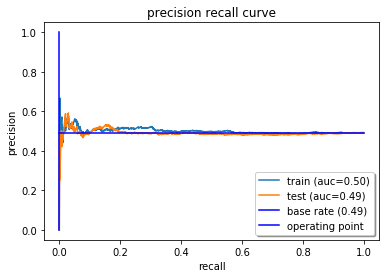

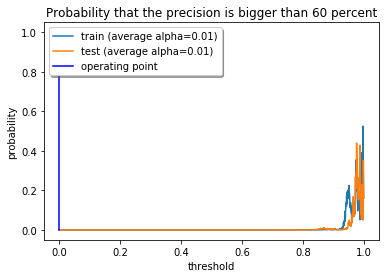

0 0 0 0


In [22]:
plotTrainTestPrecisionRecall(ytrain, ytrainScores, ytest, ytestScores)